# Titanic 

- Projenin amacı ve içeriğini anlama
- Veriyi oku ve incele  veriye çevrilebilect object verileri tesbit et
- Veri manipğlasyonları, boş verileri doldurma, kullanılacak sütunları seçme, veri tiolerini değiştirme 
- Future enginering
- Datayı x ve ye olarak ayır (regression , classification) x olarak ayır (Clustering)
- modeli eğit ve tahmin et(fit predict)


In [67]:
import pandas as pd
import warnings as warnings
warnings.filterwarnings("ignore")

In [68]:
df1 =pd.read_csv('ttrain.csv')

In [69]:
ls

'Titanic Project.ipynb'   titanictahmin.csv   ttest.csv   ttrain.csv


## Veriyi oku ve incele  veriye çevrilebilect object verileri tesbit et

In [70]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df2=pd.read_csv('ttest.csv')

In [72]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
#Burada Survived yok ona dikkat 

In [74]:
df=pd.concat([df1,df2]) #iki datayı birlştir.

In [75]:
df.shape  # datalar birleştimi

(1309, 12)

In [76]:
df.isnull().sum()  # Boş verileri gör

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [77]:
df['Fare'].mean(),df['Fare'].max(),df['Fare'].min(),df['Fare'].std()

(33.29547928134557, 512.3292, 0.0, 51.75866823917414)

In [78]:
df['Fare'].value_counts() 

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
3.1708      1
31.6833     1
7.8500      1
15.0333     1
15.5792     1
Name: count, Length: 281, dtype: int64

In [79]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)  #bos verileri kaydet

In [80]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [81]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Embarked'>

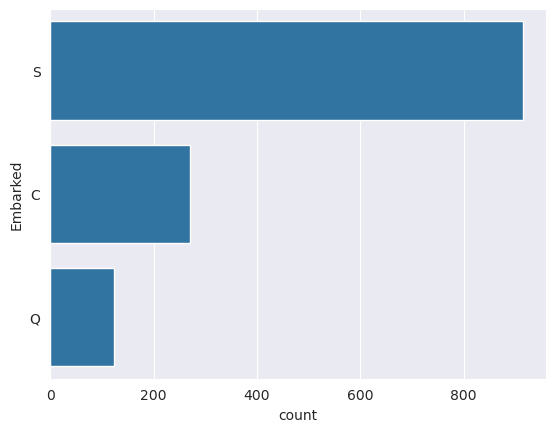

In [82]:
sns.countplot(df['Embarked'])

In [83]:
df['Embarked']= df['Embarked'].fillna('S') # embarked boş verileri doldurma 

In [84]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [85]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
C22 C26            4
                  ..
E39 E41            1
B52 B54 B56        1
C39                1
B24                1
D40                1
Name: count, Length: 186, dtype: int64

In [86]:
del df ['Cabin']  ## silme işlemi

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [88]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [89]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)  # Name alanında boşluktan sonra gelnleri al gibi 

In [90]:
df.Title.value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [91]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss') # Title ları değiştirip tekleme yapıyoruz

In [92]:
df.Title.value_counts()

Title
Mr          757
Miss        264
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [93]:
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')

In [94]:
df['Title']=df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don'],'Mr')

In [95]:
df.Title.value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [96]:
df=df.drop('Name',axis=1) # buda farklı bir silme işlemi 

In [97]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [98]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [99]:
df['Age'].mean()

29.547876241405653

In [100]:
df[df.Title == 'Master'].Age

7       2.0
16      2.0
50      7.0
59     11.0
63      4.0
       ... 
360    14.5
379     5.0
389     6.0
392    13.0
417     4.0
Name: Age, Length: 61, dtype: float64

In [101]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [102]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.024425,-0.055224,0.008942,0.031416
Survived,-0.005007,1.000000,-0.338481,-0.075808,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.386723,0.060832,0.018322,-0.558477
Age,0.024425,-0.075808,-0.386723,1.000000,-0.216262,-0.132567,0.177429
SibSp,-0.055224,-0.035322,0.060832,-0.216262,1.000000,0.373587,0.160224
Parch,0.008942,0.081629,0.018322,-0.132567,0.373587,1.000000,0.221522
Fare,0.031416,0.257307,-0.558477,0.177429,0.160224,0.221522,1.000000


In [103]:
del df['PassengerId']

In [104]:
del df['Ticket']

In [105]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,30.0,0,0,8.0500,S,Mr
414,NaN,1,female,39.0,0,0,108.9000,C,Mrs
415,NaN,3,male,38.5,0,0,7.2500,S,Mr
416,NaN,3,male,30.0,0,0,8.0500,S,Mr


In [106]:
df.isnull().sum

<bound method DataFrame.sum of      Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked  Title
0       False   False  False  False  False  False  False     False  False
1       False   False  False  False  False  False  False     False  False
2       False   False  False  False  False  False  False     False  False
3       False   False  False  False  False  False  False     False  False
4       False   False  False  False  False  False  False     False  False
..        ...     ...    ...    ...    ...    ...    ...       ...    ...
413      True   False  False  False  False  False  False     False  False
414      True   False  False  False  False  False  False     False  False
415      True   False  False  False  False  False  False     False  False
416      True   False  False  False  False  False  False     False  False
417      True   False  False  False  False  False  False     False  False

[1309 rows x 9 columns]>

In [107]:
df=pd.get_dummies(df,drop_first=True)

In [108]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1.0,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,1.0,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1.0,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0.0,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [109]:
train=df[:891]

In [110]:
test=df[891:]

In [111]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [113]:
d=DecisionTreeClassifier()

In [114]:
model=d.fit(x,y)

In [115]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,NaN,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,NaN,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,NaN,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,NaN,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False
414,NaN,1,39.0,0,0,108.9000,False,False,False,False,False,True
415,NaN,3,38.5,0,0,7.2500,True,False,True,False,True,False
416,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [116]:
del test['Survived']

In [117]:
tahmin=model.predict(test)

In [118]:
tahmin

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [119]:
sonuc=df2[['PassengerId']]

In [120]:
sonuc

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [121]:
sonuc['Survived']=tahmin

In [122]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [123]:
sonuc['Survived']=sonuc['Survived'].astype('int64') #integer yapıyoruz

In [124]:
sonuc.sample()

,PassengerId,Survived
415,1307,0


In [125]:
sonuc.to_csv('titanictahmin.csv',index=False)

In [126]:
ls

'Titanic Project.ipynb'   titanictahmin.csv   ttest.csv   ttrain.csv
